In [1]:
import sys
print(sys.version)

3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]


In [2]:
import numpy as np
import gymnasium as gym
import tankEnv

env = gym.envs.make('crudeTanksEnv-v0')

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 10)
  logger.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 5)
  logger.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the 

In [3]:
state0, data = env.reset()
action = env.action_space.sample()
obs, reward, done, truncated, info = env.step(action)
action, data['actionAvail'][1][action['farmTanks'][1]]

(OrderedDict([('farmTanks', array([12,  3])),
              ('unitFeed', array(0.76714233))]),
 False)

720 465.6414115081243


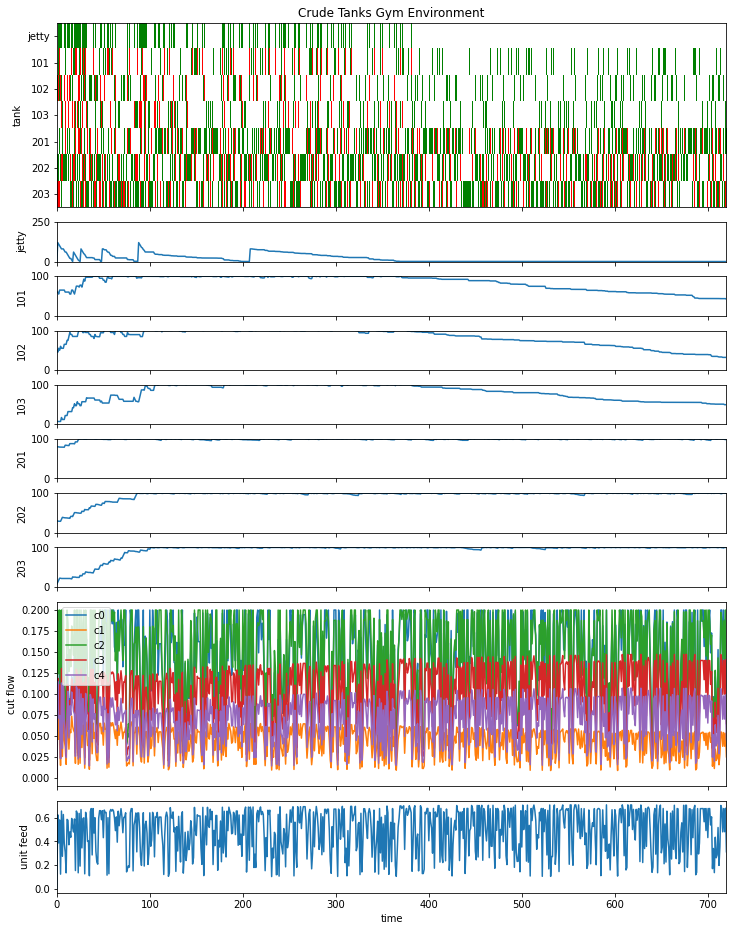

In [17]:
#env = gym.wrappers.FlattenObservation(env)
state0, data = env.reset(seed=200560)
actionAvail = data['actionAvail']
totalReward = 0
done = False
t = 0
while not done:
    action = env.action_space.sample()
    if actionAvail[0][action['farmTanks'][0]] and actionAvail[1][action['farmTanks'][1]]: 
        obs, reward, done, _, info = env.step(action)
        actionAvail = info['actionAvail']
        totalReward += reward
        t += 1
print(t, totalReward)
env.S.render()

In [5]:
(~actionAvail[1]).all()

False